# Machine learning model to predict the price of a rental apartment

Creation of a Machine Learning model to predict the price of a flat on the Airbnb platform.
To do this, I will try to apply the variables processing / transformation techniques that best suit the problem, I will identify the models that provide optimal performance, the potentially most relevant variables and the appropriate metric to contrast the different models.
I am goin to work with this data set: [data_set](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

## 1. Import data and libraries

In [1]:
#Libraries and functions that I need
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data set
pd.options.display.max_columns = None
data = pd.read_csv('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [3]:
data.shape

(14780, 89)

Although it is not recommended, I am going to do some transformations before dividing into train/test due to the knowledge I already have of the data set.

In [4]:
principalColumns = ['Experiences Offered', 'Neighbourhood', 'City','Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude', 'Number of Reviews', 'Bed Type']
#The new dataset
data1 = data[principalColumns]
data1.head()

,Experiences Offered,Neighbourhood,City,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
0,none,NaN,Austin,Entire home/apt,2,1.0,1.0,1.0,58.0,NaN,1,0,98.0,30.337361,-97.863277,42,Real Bed
1,none,NaN,Barcelona,Entire home/apt,4,1.0,1.0,1.0,70.0,NaN,2,44,80.0,41.389683,2.172625,1,Real Bed
2,none,NaN,Barcelona,Entire home/apt,4,1.0,1.0,1.0,70.0,NaN,2,42,NaN,41.393035,2.162173,0,Real Bed
3,none,NaN,Barcelona,Entire home/apt,8,2.0,3.0,4.0,229.0,NaN,2,39,92.0,41.396967,2.167418,13,Real Bed
4,none,L'Antiga Esquerra de l'Eixample,Barcelona,Entire home/apt,5,1.0,2.0,2.0,149.0,NaN,1,0,NaN,41.388685,2.155150,0,Real Bed


In [5]:
data1.dtypes

Experiences Offered      object
Neighbourhood            object
City                     object
Room Type                object
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Price                   float64
Square Feet             float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Latitude                float64
Longitude               float64
Number of Reviews         int64
Bed Type                 object
dtype: object

It is observed that we have chosen 5 columns whose type is object. We will work with these 5 columns for two reasons:
* The City column will allow us to see that almost all of our records are from Madrid and that we should focus our algorithm on Madrid.
* The rest of the columns could be interesting as object of categorization and pass it on to our model. However, that should be done once we divide by train / test.

In [6]:
#Justification for choosing only Madrid
data1['City'].value_counts()

Madrid                 13207
Barcelona                292
London                   132
Paris                    108
马德里                       52
                       ...  
Brussel                    1
Comunidad de Madrid        1
Caimari                    1
Los Angeles County         1
Onil                       1
Name: City, Length: 246, dtype: int64

Madrid is the city with more records: 13207. The next city is Barcelona, with 292 records.

In [7]:
isMadrid = data1.loc[:, 'City'] == 'Madrid'
dfMadrid = data1.loc[isMadrid]

dfMadrid.head()

,Experiences Offered,Neighbourhood,City,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
40,none,NaN,Madrid,Private room,2,2.0,1.0,1.0,28.0,NaN,1,5,87.0,40.406953,-3.670894,171,Real Bed
41,none,Recoletos,Madrid,Entire home/apt,2,1.0,0.0,1.0,58.0,NaN,1,0,96.0,40.425904,-3.681647,52,Real Bed
42,none,Recoletos,Madrid,Entire home/apt,3,1.0,0.0,2.0,70.0,NaN,2,15,87.0,40.428352,-3.687155,36,Real Bed
43,none,Recoletos,Madrid,Private room,1,1.0,1.0,1.0,26.0,NaN,1,0,95.0,40.427454,-3.685763,15,Real Bed
44,none,Recoletos,Madrid,Entire home/apt,6,1.0,2.0,3.0,70.0,NaN,1,10,NaN,40.428671,-3.685423,0,Real Bed


In [8]:
#Now, we can drop City column
dfMadrid.drop(['City'], axis=1, inplace=True)
dfMadrid.head()

,Experiences Offered,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
40,none,NaN,Private room,2,2.0,1.0,1.0,28.0,NaN,1,5,87.0,40.406953,-3.670894,171,Real Bed
41,none,Recoletos,Entire home/apt,2,1.0,0.0,1.0,58.0,NaN,1,0,96.0,40.425904,-3.681647,52,Real Bed
42,none,Recoletos,Entire home/apt,3,1.0,0.0,2.0,70.0,NaN,2,15,87.0,40.428352,-3.687155,36,Real Bed
43,none,Recoletos,Private room,1,1.0,1.0,1.0,26.0,NaN,1,0,95.0,40.427454,-3.685763,15,Real Bed
44,none,Recoletos,Entire home/apt,6,1.0,2.0,3.0,70.0,NaN,1,10,NaN,40.428671,-3.685423,0,Real Bed


In [9]:
dfMadrid.dtypes

Experiences Offered      object
Neighbourhood            object
Room Type                object
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Price                   float64
Square Feet             float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Latitude                float64
Longitude               float64
Number of Reviews         int64
Bed Type                 object
dtype: object

---

We can now divide our set into train / test and perform the appropriate transformations on our training set

## 2. Exploratory analysis

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
train, test=train_test_split(dfMadrid, test_size=0.2, random_state=0)

In [12]:
print(train.shape)
print(test.shape)

(10565, 16)
(2642, 16)


In the exploratory analysis I will perform the steps:

1. Categorize variables. For example, "Room type".
2. Studying of NA values.
3. Analyzing possible outliers.
5. Correlations.

### 2.1. Categorize variables

In [13]:
train["Experiences Offered"].value_counts()

none    10565
Name: Experiences Offered, dtype: int64

*Experiences Offered* was interesting because it showed whether the apartment offered experiences for the family, for bussines ... However, when choosing the apartments in Madrid, only "none" values remained in this variable. We have to eliminate this column since it does not contribute anything. 

In [14]:
dataMadrid = dfMadrid.drop('Experiences Offered', axis=1)

In [15]:
train, test=train_test_split(dataMadrid, test_size=0.2, random_state=0)

In [16]:
train.Neighbourhood.value_counts()

Malasaña               713
La Latina              629
Embajadores            619
Sol                    575
Justicia               461
                      ... 
Retiro                   7
Estrella                 7
Atocha                   6
Tetuán                   4
Fuencarral-El Pardo      4
Name: Neighbourhood, Length: 65, dtype: int64

In [17]:
train.Neighbourhood.isna().sum()

3567

There are many records without Neighbourhood. I believe that to fill in these gaps I will use *none* instead of mode. Thus, noise will not be added to the neighborhood that appears the most: "Malasaña"

In [18]:
train["Neighbourhood"].fillna('None', inplace=True)

In [19]:
train.Neighbourhood.value_counts()

None                   3567
Malasaña                713
La Latina               629
Embajadores             619
Sol                     575
                       ... 
Retiro                    7
Estrella                  7
Atocha                    6
Tetuán                    4
Fuencarral-El Pardo       4
Name: Neighbourhood, Length: 66, dtype: int64

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [21]:
le1 = LabelEncoder()
train['Neighbourhood'] = le1.fit_transform(train['Neighbourhood'])
train['Neighbourhood']

1461     46
6345     46
8063     20
5057     57
11435    48
         ..
14668    46
3826     46
11119    40
12128    47
3247     46
Name: Neighbourhood, Length: 10565, dtype: int32

In [22]:
train["Room Type"].isna().sum()

0

In [23]:
le2 = LabelEncoder()
train['Room Type'] = le2.fit_transform(train['Room Type'])
train['Room Type']

1461     0
6345     1
8063     0
5057     0
11435    1
        ..
14668    1
3826     0
11119    0
12128    0
3247     0
Name: Room Type, Length: 10565, dtype: int32

In [24]:
train["Bed Type"].isna().sum()

0

In [25]:
le3 = LabelEncoder()
train['Bed Type'] = le3.fit_transform(train['Bed Type'])
train['Bed Type']

1461     4
6345     4
8063     4
5057     4
11435    4
        ..
14668    4
3826     4
11119    4
12128    4
3247     4
Name: Bed Type, Length: 10565, dtype: int32

### 2.2. Studying of NA values.

In [26]:
for column in train.columns:
    print(f"Case: {column}. Number of records: {train.shape[0]}. Number of NA's: {train[column].isna().sum()}")

Case: Neighbourhood. Number of records: 10565. Number of NA's: 0
Case: Room Type. Number of records: 10565. Number of NA's: 0
Case: Accommodates. Number of records: 10565. Number of NA's: 0
Case: Bathrooms. Number of records: 10565. Number of NA's: 42
Case: Bedrooms. Number of records: 10565. Number of NA's: 20
Case: Beds. Number of records: 10565. Number of NA's: 43
Case: Price. Number of records: 10565. Number of NA's: 7
Case: Square Feet. Number of records: 10565. Number of NA's: 10138
Case: Guests Included. Number of records: 10565. Number of NA's: 0
Case: Extra People. Number of records: 10565. Number of NA's: 0
Case: Review Scores Rating. Number of records: 10565. Number of NA's: 2289
Case: Latitude. Number of records: 10565. Number of NA's: 0
Case: Longitude. Number of records: 10565. Number of NA's: 0
Case: Number of Reviews. Number of records: 10565. Number of NA's: 0
Case: Bed Type. Number of records: 10565. Number of NA's: 0


This study shows that the *Square Feet* variable has too many Na's values. It must be removed. Also, in the third section (Preprocessing), I will handle the variables with some NAs: *Bathrooms, Bedrooms, Beds, Review Scores Rating*.

### 2.3. Analyzing possible outliers.

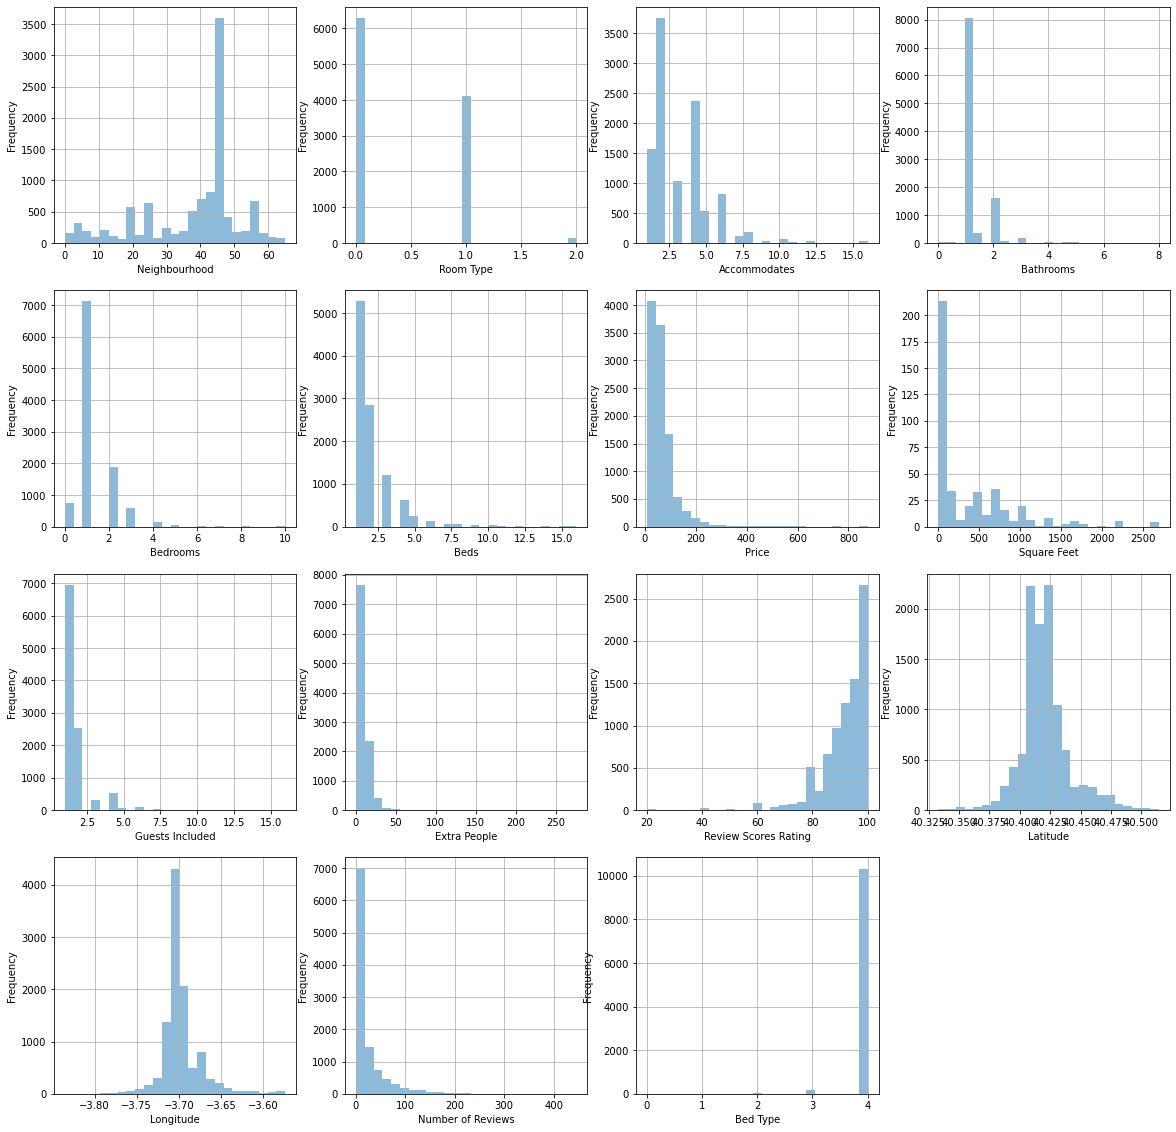

In [27]:
plt.figure(figsize=(20, 20))

a=1
for i in train.columns:
    plt.subplot(4,4,a)
    train[i].plot.hist(alpha=0.5, bins=25, grid = True)
    #plt.axis([0, 10, 0, 10000])
    plt.xlabel(i)
    a = a + 1

plt.show()

From these histograms we can see that:
* Some variables have very high values with few records. They could be hotels and hostels that have a high number of bathrooms, bedrooms and beds. In my model I will omit these records and focus on private homes.

### 2.4. Correlations
Finally, the correlation matrix will be represented to check if there is any strong dependency between the working variables that are currently selected.

In [28]:
train.corr() #correlation matrix

,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
Neighbourhood,1.000000,-0.016217,0.017594,0.040717,0.003261,-0.009231,0.045529,0.023808,0.015571,-0.000374,0.023855,-0.086610,0.087463,0.001811,0.007446
Room Type,-0.016217,1.000000,-0.491908,0.031875,-0.242041,-0.268961,-0.449014,-0.080524,-0.359760,-0.107725,0.008738,-0.013488,0.066860,-0.143482,0.008235
Accommodates,0.017594,-0.491908,1.000000,0.317911,0.675677,0.822312,0.575062,0.332945,0.577543,0.264841,-0.066422,0.000542,-0.047285,0.086196,0.033459
Bathrooms,0.040717,0.031875,0.317911,1.000000,0.419796,0.380313,0.345112,0.382426,0.179387,0.081145,0.012926,0.048628,0.013917,-0.060366,0.041552
Bedrooms,0.003261,-0.242041,0.675677,0.419796,1.000000,0.692318,0.519582,0.428393,0.429051,0.140819,0.012664,0.036132,0.014225,-0.020984,0.065281
Beds,-0.009231,-0.268961,0.822312,0.380313,0.692318,1.000000,0.489003,0.332492,0.456033,0.202553,-0.055416,0.017624,-0.021139,0.039015,0.054421
Price,0.045529,-0.449014,0.575062,0.345112,0.519582,0.489003,1.000000,0.283518,0.363070,0.105152,0.057216,0.067262,-0.014359,-0.030685,0.032265
Square Feet,0.023808,-0.080524,0.332945,0.382426,0.428393,0.332492,0.283518,1.000000,0.167870,0.136123,-0.006055,0.109824,0.014079,-0.093036,0.077387
Guests Included,0.015571,-0.359760,0.577543,0.179387,0.429051,0.456033,0.363070,0.167870,1.000000,0.335939,0.006740,-0.007689,-0.033740,0.121515,0.025844
Extra People,-0.000374,-0.107725,0.264841,0.081145,0.140819,0.202553,0.105152,0.136123,0.335939,1.000000,0.019391,0.006516,-0.013374,0.073336,-0.017519


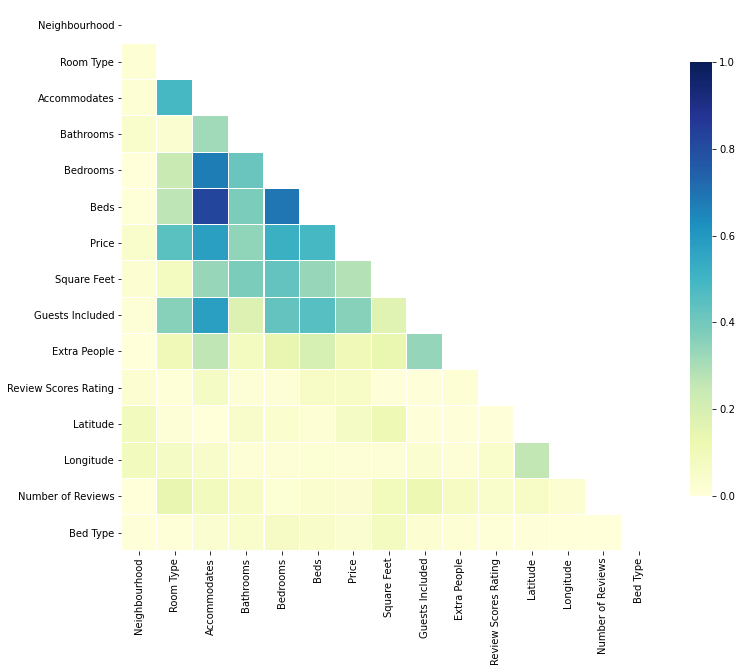

In [29]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

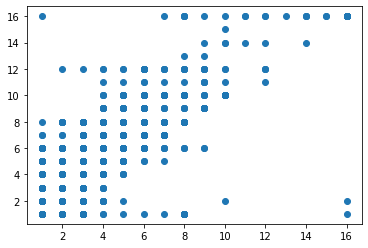

In [30]:
plt.scatter(train['Beds'], train['Accommodates'])
plt.show()

The correlation matrix shows that there is a strong relationship between *Accommodates* and *Beds*. By representing one against the other, it seems that there is a relationship of the type x = y. One of the two will be removed in our dataset.

## 3. Preprocessing

In this section, we will perform the necessary transformations seen in the previous section:
1. Delete Accommodates column
2. Fill Na's.
3. Eliminate outliers.
4. Extra: apply the logarithm to Price.

### 3.1. Delete Accommodates and Square Feet columns.

In [31]:
train = train.drop(['Accommodates','Square Feet'], axis=1)
train.head(10)

,Neighbourhood,Room Type,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
1461,46,0,1.0,1.0,1.0,55.0,1,0,88.0,40.411016,-3.699656,72,4
6345,46,1,1.0,1.0,1.0,21.0,1,0,NaN,40.424785,-3.658300,0,4
8063,20,0,1.0,2.0,4.0,110.0,4,15,93.0,40.415191,-3.698591,58,4
5057,57,0,1.0,0.0,1.0,39.0,1,0,87.0,40.418986,-3.707276,11,4
11435,48,1,2.0,1.0,1.0,500.0,1,0,NaN,40.405865,-3.676475,1,4
9319,46,1,1.0,1.0,1.0,65.0,1,0,NaN,40.401892,-3.698068,0,4
8755,40,0,1.0,1.0,2.0,50.0,2,20,93.0,40.411430,-3.706605,134,4
10808,46,0,1.0,1.0,1.0,45.0,1,0,91.0,40.408046,-3.708729,28,4
4779,59,0,1.0,1.0,2.0,50.0,2,0,93.0,40.430682,-3.704753,65,4
11948,11,0,2.0,2.0,2.0,56.0,2,15,98.0,40.456860,-3.707487,9,4


### 3.2. Fill Na's.

In [32]:
#Bathrooms, Bedrooms, Beds, Review Scores Rating are all discrete variables, they will be filled with the mode.
train["Bathrooms"].fillna(train["Bathrooms"].mode()[0], inplace=True)
train["Bedrooms"].fillna(train["Bedrooms"].mode()[0], inplace=True)
train["Beds"].fillna(train["Beds"].mode()[0], inplace=True)
train["Review Scores Rating"].fillna(train["Review Scores Rating"].mode()[0], inplace=True)

### 3.3. Eliminate outliers.

In [33]:
#Bathrooms, Bedrooms, Beds
train1 = train[train['Bathrooms'] < 6]
train2 = train1[train1['Bedrooms'] < 7]
train3 = train2[train2['Beds'] < 10]

### 3.4 Eliminate Nan and low values in Price

In [34]:
trainF = train3[train3['Price'] > 10]
testF = test[test['Price'] > 10]

At this point, training and test can be divided into X and Y.

In [35]:
X_train = trainF.drop('Price', axis=1)
y_train = trainF['Price'].values

In [36]:
X_test = testF.drop('Price', axis=1)
y_test = testF['Price'].values

### 3.5. Extra: apply the logarithm to Price.
We are going to study our set y_ train to see that it is a heeled over variable. Logarithmic transformation is usually applied to this type of variables since it gives better results in the models.

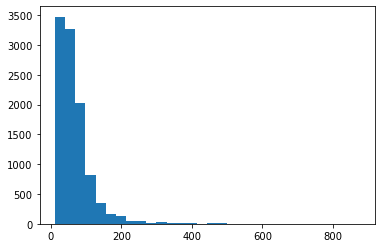

In [37]:
plt.hist(y_train, bins=30)
plt.show()


In [38]:
print(np.isnan(y_train).any())

False


In [39]:
y_trainF = np.log10(y_train)

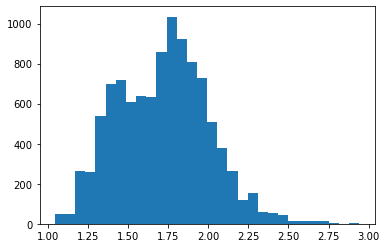

In [40]:
plt.hist(y_trainF, bins=30)
plt.show()

## 4. Application of different models
In this section, I will prepare the test data to apply some models that we have seen in the module. Also, it would be interesting to apply scaling to data sets. Then the models will be applied.

### 4.1. Fitting X_test and y_test

In [41]:
#X_test Categorization
X_test["Neighbourhood"].fillna('None', inplace=True)
X_test['Neighbourhood'] = le1.transform(X_test['Neighbourhood'])
X_test['Room Type'] = le2.transform(X_test['Room Type'])
X_test['Bed Type'] = le3.transform(X_test['Bed Type'])


In [42]:
#X_test. Delete Accommodates and Square Feet
X_test = X_test.drop(['Accommodates','Square Feet'], axis=1)

In [43]:
#X_test. Fill Na's
X_test["Bathrooms"].fillna(X_test["Bathrooms"].mode()[0], inplace=True)
X_test["Bedrooms"].fillna(X_test["Bedrooms"].mode()[0], inplace=True)
X_test["Beds"].fillna(X_test["Beds"].mode()[0], inplace=True)
X_test["Review Scores Rating"].fillna(X_test["Review Scores Rating"].mode()[0], inplace=True)

In [44]:
features = X_test.columns

In [45]:
#y_test. Log10
y_testF = np.log10(y_test)

In [46]:
#Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

### 4.2. Using Logistic Regression Model
We apply the Lasso regression model to see how it works. In addition, this model will provide interesting information on the variables with the greatest weight when predicting the price.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [48]:
alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)


best mean cross-validation score: -0.051
best parameters: {'alpha': 0.1}


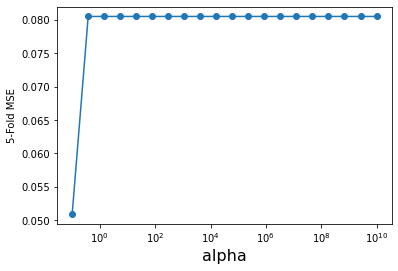

In [49]:
grid.fit(XtrainScaled, y_trainF )
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

#### 4.2.1 Metrics in test

In [50]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_trainF)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)

mseTrainModelLasso = mean_squared_error(y_trainF,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.0508
MSE Modelo Lasso (test) : 7.2e+03
Neighbourhood 0.0
Room Type -0.09070402852032133
Bathrooms 0.0
Bedrooms 0.0
Beds 0.011911589579509513
Guests Included 0.0
Extra People 0.0
Review Scores Rating 0.0
Latitude 0.0
Longitude -0.0
Number of Reviews -0.0
Bed Type 0.0


**We have an MSE in test of 7.2e+03** This is, approximately, 85€ of error in every predict. And, the most important variable is *Beds*

### 4.3. Using Boosted Trees Model

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(XtrainScaled, y_trainF)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.0s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.1s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  12.2s
[CV] END ...............learning_rate=0.1, n_esti

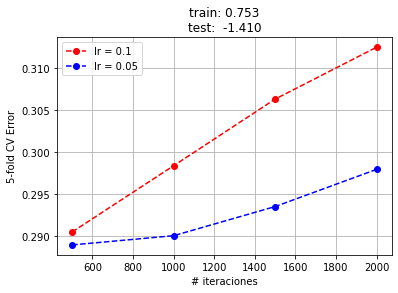

In [58]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(XtrainScaled, y_trainF)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(XtrainScaled,y_trainF),bt.score(XtestScaled,y_test)))
plt.grid()
plt.show()

**This model works worse than the previous one in train. In addition, I must have made a mistake in the test since it came out negative.**

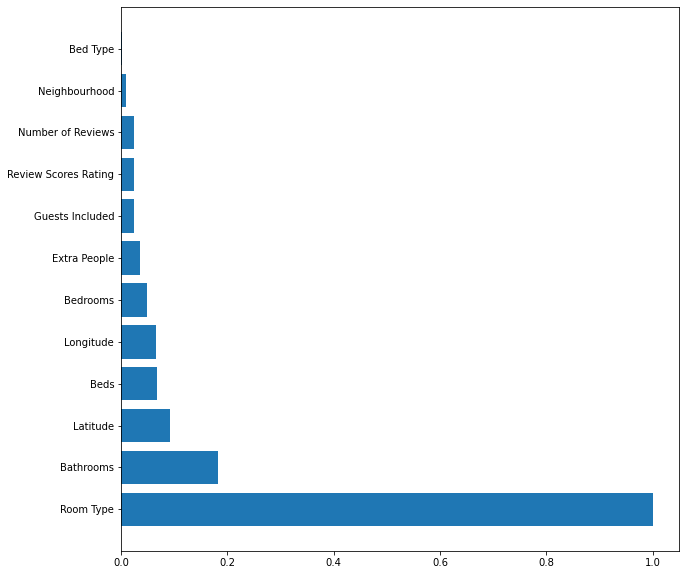

In [57]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),features[indices])
plt.show()

**According to this model, the most important variable is Room Type. Second, and with less importance, would be Bathrooms**